#### Data Analytics Questions
- Which BART station is the busiest?
- What is the least popular BART route?
- When is the best time to go to SF from Berkeley if you want to find a seat?
- Which day of the week is the busiest?
- How many people take the BART late at night?

#### Data Science Questions
- Question A: Compute the straight line distance between every station
- Question B: Build a model that can predicted the number of people commuting to work by
- Bart between any 2 stations:
- How would you approach that?
- What additional data would you need?
- How would you want the city or Bart officials to use your data?

#### Data Preparation
- Append the two ridership files for 2016 and 2017
- Merge the station data file
- Answer data analytics questions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

from math import sin, cos, sqrt, atan2
import math

warnings.filterwarnings("ignore")

In [2]:
df1=pd.read_csv("date-hour-soo-dest-2016.csv")
df2=pd.read_csv("date-hour-soo-dest-2017.csv")

df1.columns=["Date","Hour","Origin Station","Destination Station", "Trip Count"]
df2.columns=["Date","Hour","Origin Station","Destination Station", "Trip Count"]

df=pd.concat([df1,df2],ignore_index=True)

In [3]:
df

Date  Hour Origin Station Destination Station  Trip Count
0         2016-01-01     0           12TH                16TH           1
1         2016-01-01     0           12TH                24TH           4
2         2016-01-01     0           12TH                ASHB           4
3         2016-01-01     0           12TH                BALB           2
4         2016-01-01     0           12TH                BAYF           2
...              ...   ...            ...                 ...         ...
19947750  2018-01-01     2           WOAK                POWL           3
19947751  2018-01-01     2           WOAK                RICH           1
19947752  2018-01-01     2           WOAK                SBRN           1
19947753  2018-01-01     2           WOAK                SHAY           2
19947754  2018-01-01     2           WOAK                WOAK           2

[19947755 rows x 5 columns]

In [4]:
df.shape

(19947755, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19947755 entries, 0 to 19947754
Data columns (total 5 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   Date                 object
 1   Hour                 int64 
 2   Origin Station       object
 3   Destination Station  object
 4   Trip Count           int64 
dtypes: int64(2), object(3)
memory usage: 760.9+ MB


In [6]:
df.sample(10)

Date  Hour Origin Station Destination Station  Trip Count
6792848   2016-09-05    22           LAFY                MONT           3
737231    2016-01-28    16           RICH                MCAR          16
4509867   2016-06-13    20           GLEN                UCTY           1
9642005   2016-12-19     8           SHAY                MONT          94
3932726   2016-05-23    17           HAYW                PLZA           2
13539733  2017-05-13     6           COLS                WDUB           1
856306    2016-02-02     6           EMBR                WDUB           1
3945      2016-01-01     9           19TH                SANL           2
8130967   2016-10-24    13           MCAR                DALY           4
5329681   2016-07-13    18           FRMT                NCON           2

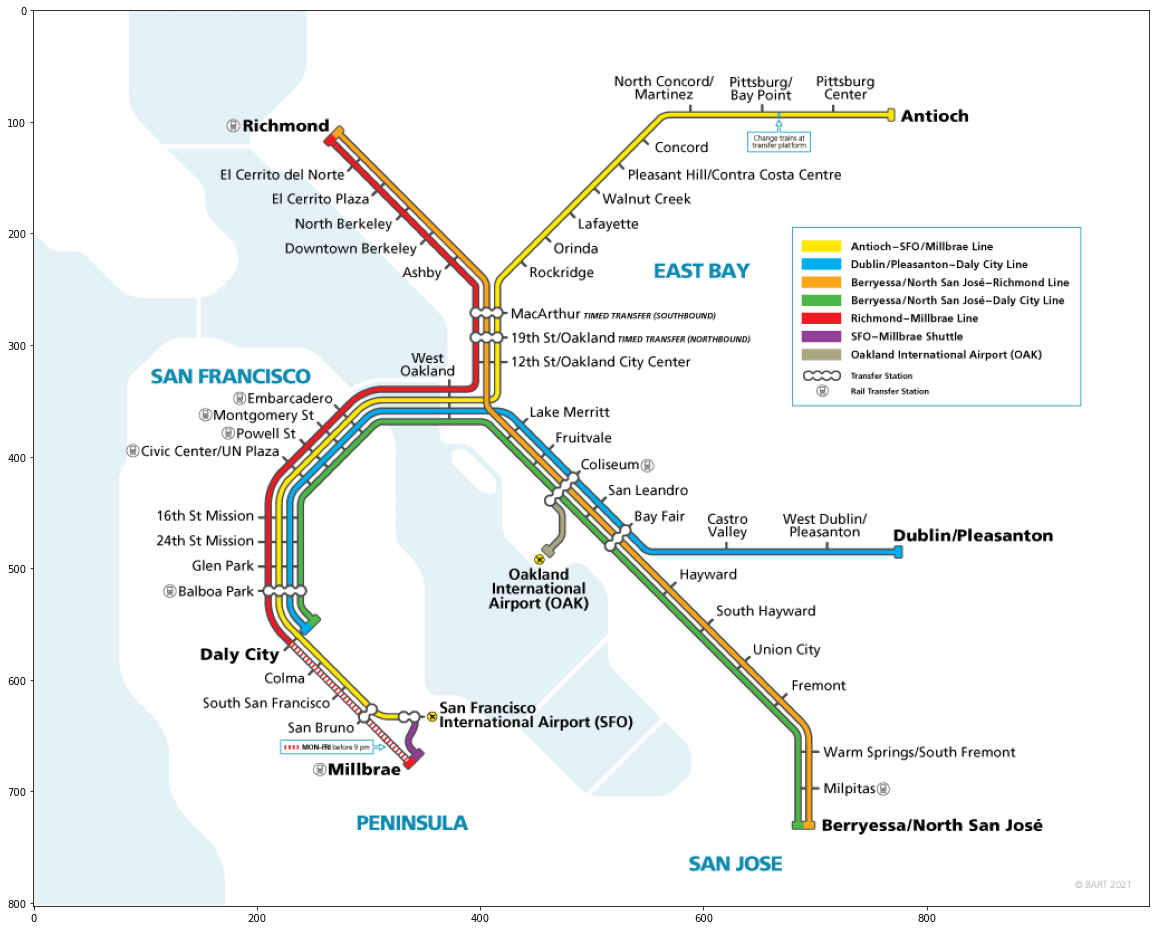

In [7]:
plt.figure(figsize=(20,20))
img=plt.imread('system-map-weekday.png')
plt.imshow(img)
plt.show()

In [8]:
station_coord=pd.read_csv("station_info.csv")
station_coord

Abbreviation                                        Description  \
0          12TH  1245 Broadway, Oakland CA 94612<br />12th St. ...   
1          16TH  2000 Mission Street, San Francisco CA 94110<br...   
2          19TH  1900 Broadway, Oakland CA 94612<br />19th Stre...   
3          24TH  2800 Mission Street, San Francisco CA 94110<br...   
4          ASHB  3100 Adeline Street, Berkeley CA 94703<br />As...   
5          BALB  401 Geneva Avenue, San Francisco CA 94112<br /...   
6          BAYF  15242 Hesperian Blvd., San Leandro CA 94578<br...   
7          CAST  3301 Norbridge Dr., Castro Valley CA 94546<br ...   
8          CIVC  1150 Market Street, San Francisco CA 94102<br ...   
9          COLS  7200 San Leandro St., Oakland CA 94621<br />We...   
10         COLM  365 D Street, Colma CA 94014<br />The Town of ...   
11         CONC  1451 Oakland Avenue, Concord CA 94520<br />Con...   
12         DALY  500 John Daly Blvd., Daly City CA 94014<br />D...   
13         DBRK  2160 Shattuck Avenue, Berkeley CA 94704<br />T...   
14         DELN  6400 Cutting Blvd., El Cerrito CA 94530<br />S...   
15         DUBL  5801 Owens Dr., Pleasanton CA 94588<br />This ...   
16         EMBR  298 Market Street, San Francisco CA 94111<br /...   
17         FRMT  2000 BART Way, Fremont CA 94536<br />Fremont S...   
18         FTVL  3401 East 12th Street, Oakland CA 94601<br />O...   
19         GLEN  2901 Diamond Street, San Francisco CA 94131<br...   
20         HAYW  699 'B' Street, Hayward CA 94541<br />The City...   
21         LAFY  3601 Deer Hill Road, Lafayette CA 94549<br />C...   
22         LAKE  800 Madison Street, Oakland CA 94607<br />Lake...   
23         MCAR  555 40th Street, Oakland CA 94609<br />MacArth...   
24         MLBR  200 North Rollins Road, Millbrae CA 94030<br /...   
25         MONT  598 Market Street, San Francisco CA 94104<br /...   
26         NBRK  1750 Sacramento Street, Berkeley CA 94702<br /...   
27         NCON  3700 Port Chicago Highway, Concord CA 94520<br...   
28         OAKL  1 Airport Drive, Oakland CA 94621<br />Located...   
29         ORIN  11 Camino Pablo, Orinda CA 94563<br />Original...   
30         PHIL  1365 Treat Blvd., Walnut Creek CA 94597<br />B...   
31         PITT  1700 West Leland Road, Pittsburg CA 94565<br /...   
32         PLZA  6699 Fairmount Avenue, El Cerrito CA 94530<br ...   
33         POWL  899 Market Street, San Francisco CA 94102<br /...   
34         RICH  1700 Nevin Avenue, Richmond CA 94801<br />Thre...   
35         ROCK  5660 College Avenue, Oakland CA 94618<br />Nam...   
36         SANL  1401 San Leandro Blvd., San Leandro CA 94577<b...   
37         SBRN  1151 Huntington Avenue, San Bruno CA 94066<br ...   
38         SFIA  International Terminal, Level 3, San Francisco...   
39         SHAY  28601 Dixon Street, Hayward CA 94544<br />Hayw...   
40         SSAN  1333 Mission Road, South San Francisco CA 9408...   
41         UCTY  10 Union Square, Union City CA 94587<br />Inco...   
42         WARM  45193 Warm Springs Blvd, Fremont, CA 94539<br ...   
43         WCRK  200 Ygnacio Valley Road, Walnut Creek CA 94596...   
44         WDUB  6501 Golden Gate Drive, Dublin CA 94568<br />T...   
45         WOAK  1451 7th Street, Oakland CA 94607<br />The Wes...   

                   Location                                      Name  
0   -122.271450,37.803768,0       12th St. Oakland City Center (12TH)  
1   -122.419694,37.765062,0                   16th St. Mission (16TH)  
2   -122.268602,37.808350,0                   19th St. Oakland (19TH)  
3   -122.418143,37.752470,0                   24th St. Mission (24TH)  
4   -122.270062,37.852803,0                              Ashby (ASHB)  
5   -122.447506,37.721585,0                        Balboa Park (BALB)  
6   -122.126514,37.696924,0                           Bay Fair (BAYF)  
7   -122.075602,37.690746,0                      Castro Valley (CAST)  
8   -122.414123,37.779732,0              Civic Center/UN Plaza (

In [9]:
station_coord['Latitude']= station_coord.Location
station_coord['Longitude']= station_coord.Location

for i in range(len(station_coord.Location)):
    station_coord['Longitude'][i]= station_coord.Location[i][:11]
    station_coord['Latitude'][i]= station_coord.Location[i][12:21]

station_coord=station_coord.drop(['Description', 'Location', 'Name'], axis=1)
station_coord

Abbreviation   Latitude    Longitude
0          12TH  37.803768  -122.271450
1          16TH  37.765062  -122.419694
2          19TH  37.808350  -122.268602
3          24TH  37.752470  -122.418143
4          ASHB  37.852803  -122.270062
5          BALB  37.721585  -122.447506
6          BAYF  37.696924  -122.126514
7          CAST  37.690746  -122.075602
8          CIVC  37.779732  -122.414123
9          COLS  37.753661  -122.196869
10         COLM  37.684638  -122.466233
11         CONC  37.973737  -122.029095
12         DALY  37.706121  -122.469081
13         DBRK  37.870104  -122.268133
14         DELN  37.925086  -122.316794
15         DUBL  37.701687  -121.899179
16         EMBR  37.792874  -122.397020
17         FRMT  37.557465  -121.976608
18         FTVL  37.774836  -122.224175
19         GLEN  37.733064  -122.433817
20         HAYW  37.669723  -122.087018
21         LAFY  37.893176  -122.124630
22         LAKE  37.797027  -122.265180
23         MCAR  37.829065  -122.267040
24         MLBR  37.600271  -122.386702
25         MONT  37.789405  -122.401066
26         NBRK  37.873967  -122.283440
27         NCON  38.003193  -122.024653
28         OAKL  37.713238  -122.212191
29         ORIN  37.878361  -122.183791
30         PHIL  37.928468  -122.056012
31         PITT  38.018914  -121.945154
32         PLZA  37.902632  -122.298904
33         POWL  37.784471  -122.407974
34         RICH  37.936853  -122.353099
35         ROCK  37.844702  -122.251371
36         SANL  37.721947  -122.160844
37         SBRN  37.637761  -122.416287
38         SFIA  37.615966  -122.392409
39         SHAY  37.634375  -122.057189
40         SSAN  37.664245  -122.443960
41         UCTY  37.590630  -122.017388
42         WARM  37.502171  -121.939313
43         WCRK  37.905522  -122.067527
44         WDUB  37.699756  -121.928240
45         WOAK  37.804872  -122.295140

In [10]:
# Merge all datas
station_coord.columns=['Origin Station', 'OS Latitude', 'OS Longitude']
df=pd.merge(df, station_coord)

station_coord.columns=['Destination Station', 'DS Latitude', 'DS Longitude']
df=pd.merge(df, station_coord)
df

Date  Hour Origin Station Destination Station  Trip Count  \
0         2016-01-01     0           12TH                16TH           1   
1         2016-01-01     1           12TH                16TH          10   
2         2016-01-01     2           12TH                16TH          14   
3         2016-01-01     3           12TH                16TH           1   
4         2016-01-01     8           12TH                16TH           1   
...              ...   ...            ...                 ...         ...   
19947750  2017-12-31    14           WARM                WARM           1   
19947751  2017-12-31    16           WARM                WARM           4   
19947752  2017-12-31    20           WARM                WARM           4   
19947753  2017-12-31    21           WARM                WARM           1   
19947754  2017-12-31    22           WARM                WARM           1   

         OS Latitude OS Longitude DS Latitude DS Longitude  
0          37.803768  -122.271450   37.765062  -122.419694  
1          37.803768  -122.271450   37.765062  -122.419694  
2          37.803768  -122.271450   37.765062  -122.419694  
3          37.803768  -122.271450   37.765062  -122.419694  
4          37.803768  -122.271450   37.765062  -122.419694  
...              ...          ...         ...          ...  
19947750   37.502171  -121.939313   37.502171  -121.939313  
19947751   37.502171  -121.939313   37.502171  -121.939313  
19947752   37.502171  -121.939313   37.502171  -121.939313  
19947753   37.502171  -121.939313   37.502171  -121.939313  
19947754   37.502171  -121.939313   37.502171  -121.939313  

[19947755 rows x 9 columns]

In [11]:
df.isnull().sum()

Date                   0
Hour                   0
Origin Station         0
Destination Station    0
Trip Count             0
OS Latitude            0
OS Longitude           0
DS Latitude            0
DS Longitude           0
dtype: int64

In [12]:
df=df.drop_duplicates()

In [13]:
df['Date']=pd.to_datetime(df.Date)

df['Day']=df['Date'].dt.dayofweek
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

df['Day Name']=df['Date'].dt.day_name()
df['Month Name']=df['Date'].dt.month_name()

df.drop('Date', axis=1, inplace=True)

In [14]:
df

Hour Origin Station Destination Station  Trip Count OS Latitude  \
0            0           12TH                16TH           1   37.803768   
1            1           12TH                16TH          10   37.803768   
2            2           12TH                16TH          14   37.803768   
3            3           12TH                16TH           1   37.803768   
4            8           12TH                16TH           1   37.803768   
...        ...            ...                 ...         ...         ...   
19947750    14           WARM                WARM           1   37.502171   
19947751    16           WARM                WARM           4   37.502171   
19947752    20           WARM                WARM           4   37.502171   
19947753    21           WARM                WARM           1   37.502171   
19947754    22           WARM                WARM           1   37.502171   

         OS Longitude DS Latitude DS Longitude  Day  Month  Year Day Name  \
0         -122.271450   37.765062  -122.419694    4      1  2016   Friday   
1         -122.271450   37.765062  -122.419694    4      1  2016   Friday   
2         -122.271450   37.765062  -122.419694    4      1  2016   Friday   
3         -122.271450   37.765062  -122.419694    4      1  2016   Friday   
4         -122.271450   37.765062  -122.419694    4      1  2016   Friday   
...               ...         ...          ...  ...    ...   ...      ...   
19947750  -121.939313   37.502171  -121.939313    6     12  2017   Sunday   
19947751  -121.939313   37.502171  -121.939313    6     12  2017   Sunday   
19947752  -121.939313   37.502171  -121.939313    6     12  2017   Sunday   
19947753  -121.939313   37.502171  -121.939313    6     12  2017   Sunday   
19947754  -121.939313   37.502171  -121.939313    6     12  2017   Sunday   

         Month Name  
0           January  
1           January  
2           January  
3           January  
4           January  
...             ...  
19947750   December  
19947751   December  
19947752   December  
19947753   December  
19947754   December  

[19945676 rows x 13 columns]

In [15]:
#Download cleaned data
df.to_csv("bart.csv")

In [16]:
shuffle=df.sample(frac=1)

In [17]:
shuffle

Hour Origin Station Destination Station  Trip Count OS Latitude  \
5787075     11           GLEN                FTVL           2   37.733064   
15069649    23           WOAK                COLS           2   37.804872   
4195389     15           DELN                DELN           1   37.925086   
6813997     18           WOAK                LAKE           5   37.804872   
15069044    12           WOAK                COLS           5   37.804872   
...        ...            ...                 ...         ...         ...   
5748657     20           EMBR                FTVL          51   37.792874   
1292160     23           FTVL                ASHB           1   37.774836   
17716353    18           DALY                RICH           6   37.706121   
12009920    22           SBRN                SHAY           1   37.637761   
17611122     1           19TH                RICH           1   37.808350   

         OS Longitude DS Latitude DS Longitude  Day  Month  Year  Day Name  \
5787075   -122.433817   37.774836  -122.224175    5     11  2016  Saturday   
15069649  -122.295140   37.753661  -122.196869    1      3  2016   Tuesday   
4195389   -122.316794   37.925086  -122.316794    3      3  2016  Thursday   
6813997   -122.295140   37.797027  -122.265180    4      3  2016    Friday   
15069044  -122.295140   37.753661  -122.196869    3      1  2016  Thursday   
...               ...         ...          ...  ...    ...   ...       ...   
5748657   -122.397020   37.774836  -122.224175    0      8  2016    Monday   
1292160   -122.224175   37.852803  -122.270062    6      4  2016    Sunday   
17716353  -122.469081   37.936853  -122.353099    0      6  2017    Monday   
12009920  -122.416287   37.634375  -122.057189    5      2  2017  Saturday   
17611122  -122.268602   37.936853  -122.353099    5     11  2016  Saturday   

         Month Name  
5787075    November  
15069649      March  
4195389       March  
6813997       March  
15069044    January  
...             ...  
5748657      August  
1292160       April  
17716353       June  
12009920   February  
17611122   November  

[19945676 rows x 13 columns]

In [18]:
result=np.array_split(shuffle,3)

In [19]:
dfa=result[0].reset_index().drop("index",axis=1)
dfb=result[1].reset_index().drop("index",axis=1)
dfc=result[2].reset_index().drop("index",axis=1)

In [20]:
dfa.shape

(6648559, 13)

In [21]:
dfa.to_csv("bart_1.csv")
dfb.to_csv("bart_2.csv")
dfc.to_csv("bart_3.csv")

In [22]:
df=pd.read_csv("bart_1.csv").drop("Unnamed: 0",axis=1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6648559 entries, 0 to 6648558
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Hour                 int64  
 1   Origin Station       object 
 2   Destination Station  object 
 3   Trip Count           int64  
 4   OS Latitude          float64
 5   OS Longitude         float64
 6   DS Latitude          float64
 7   DS Longitude         float64
 8   Day                  int64  
 9   Month                int64  
 10  Year                 int64  
 11  Day Name             object 
 12  Month Name           object 
dtypes: float64(4), int64(5), object(4)
memory usage: 659.4+ MB


In [24]:
# Question A: Compute the straight line distance between every station?

In [25]:
# pip install geopy

In [26]:
import geopy.distance

df['Distance']=df['Trip Count']
for i in range(len(df)):
    lat_o=df['OS Latitude'][i]
    lon_o=df['OS Longitude'][i]
    lat_d=df['DS Latitude'][i]
    lon_d=df['DS Longitude'][i]
    
    coords_1 = (lat_o, lon_o)
    coords_2 = (lat_d, lon_d)
    df['Distance'][i]= geopy.distance.distance(coords_1,coords_2).km

In [27]:
df

Hour Origin Station Destination Station  Trip Count  OS Latitude  \
0          11           GLEN                FTVL           2    37.733064   
1          23           WOAK                COLS           2    37.804872   
2          15           DELN                DELN           1    37.925086   
3          18           WOAK                LAKE           5    37.804872   
4          12           WOAK                COLS           5    37.804872   
...       ...            ...                 ...         ...          ...   
6648554     6           ROCK                HAYW           1    37.844702   
6648555    16           LAKE                SANL          43    37.797027   
6648556    11           NBRK                19TH           6    37.873967   
6648557    19           SHAY                DELN           2    37.634375   
6648558    11           DBRK                COLS           3    37.870104   

         OS Longitude  DS Latitude  DS Longitude  Day  Month  Year   Day Name  \
0         -122.433817    37.774836   -122.224175    5     11  2016   Saturday   
1         -122.295140    37.753661   -122.196869    1      3  2016    Tuesday   
2         -122.316794    37.925086   -122.316794    3      3  2016   Thursday   
3         -122.295140    37.797027   -122.265180    4      3  2016     Friday   
4         -122.295140    37.753661   -122.196869    3      1  2016   Thursday   
...               ...          ...           ...  ...    ...   ...        ...   
6648554   -122.251371    37.669723   -122.087018    3      1  2016   Thursday   
6648555   -122.265180    37.721947   -122.160844    3      5  2017   Thursday   
6648556   -122.283440    37.808350   -122.268602    2     10  2016  Wednesday   
6648557   -122.057189    37.925086   -122.316794    2      6  2016  Wednesday   
6648558   -122.268133    37.753661   -122.196869    0      2  2017     Monday   

        Month Name   Distance  
0         November  19.047598  
1            March  10.356404  
2            March   0.000000  
3            March   2.778519  
4          January  10.356404  
...            ...        ...  
6648554    January  24.226874  
6648555        May  12.408541  
6648556    October   7.399240  
6648557       June  39.549492  
6648558   February  14.367236  

[6648559 rows x 14 columns]

In [28]:
import networkx as nx
df_distance_table=nx.from_pandas_edgelist(df,source="Origin Station",target="Destination Station",edge_attr=True)

In [29]:
df_distance_table.nodes()

NodeView(('GLEN', 'FTVL', 'WOAK', 'COLS', 'DELN', 'LAKE', 'WCRK', 'DBRK', 'ASHB', '16TH', 'FRMT', 'ORIN', 'HAYW', 'DALY', 'NBRK', 'EMBR', 'CIVC', 'MLBR', '12TH', 'RICH', 'MCAR', 'POWL', 'SANL', 'UCTY', 'SFIA', 'SHAY', 'PHIL', 'SSAN', 'BALB', '24TH', 'DUBL', 'BAYF', '19TH', 'MONT', 'WDUB', 'COLM', 'SBRN', 'CAST', 'OAKL', 'LAFY', 'PITT', 'ROCK', 'CONC', 'NCON', 'PLZA', 'WARM'))

In [30]:
df_distance_table.edges()

EdgeView([('GLEN', 'FTVL'), ('GLEN', 'MLBR'), ('GLEN', 'DBRK'), ('GLEN', 'DALY'), ('GLEN', 'SSAN'), ('GLEN', 'BAYF'), ('GLEN', 'ASHB'), ('GLEN', 'PHIL'), ('GLEN', 'COLM'), ('GLEN', '24TH'), ('GLEN', 'RICH'), ('GLEN', 'FRMT'), ('GLEN', 'MCAR'), ('GLEN', '16TH'), ('GLEN', 'GLEN'), ('GLEN', 'POWL'), ('GLEN', 'LAKE'), ('GLEN', 'UCTY'), ('GLEN', 'CIVC'), ('GLEN', 'DELN'), ('GLEN', 'SFIA'), ('GLEN', 'PITT'), ('GLEN', '12TH'), ('GLEN', 'COLS'), ('GLEN', 'SANL'), ('GLEN', '19TH'), ('GLEN', 'WCRK'), ('GLEN', 'MONT'), ('GLEN', 'EMBR'), ('GLEN', 'SBRN'), ('GLEN', 'HAYW'), ('GLEN', 'WOAK'), ('GLEN', 'DUBL'), ('GLEN', 'PLZA'), ('GLEN', 'WARM'), ('GLEN', 'ORIN'), ('GLEN', 'ROCK'), ('GLEN', 'BALB'), ('GLEN', 'NBRK'), ('GLEN', 'CONC'), ('GLEN', 'CAST'), ('GLEN', 'LAFY'), ('GLEN', 'SHAY'), ('GLEN', 'OAKL'), ('GLEN', 'NCON'), ('GLEN', 'WDUB'), ('FTVL', 'BAYF'), ('FTVL', 'EMBR'), ('FTVL', 'POWL'), ('FTVL', 'CAST'), ('FTVL', 'FRMT'), ('FTVL', 'ROCK'), ('FTVL', 'WOAK'), ('FTVL', 'HAYW'), ('FTVL', 'MLBR'), 

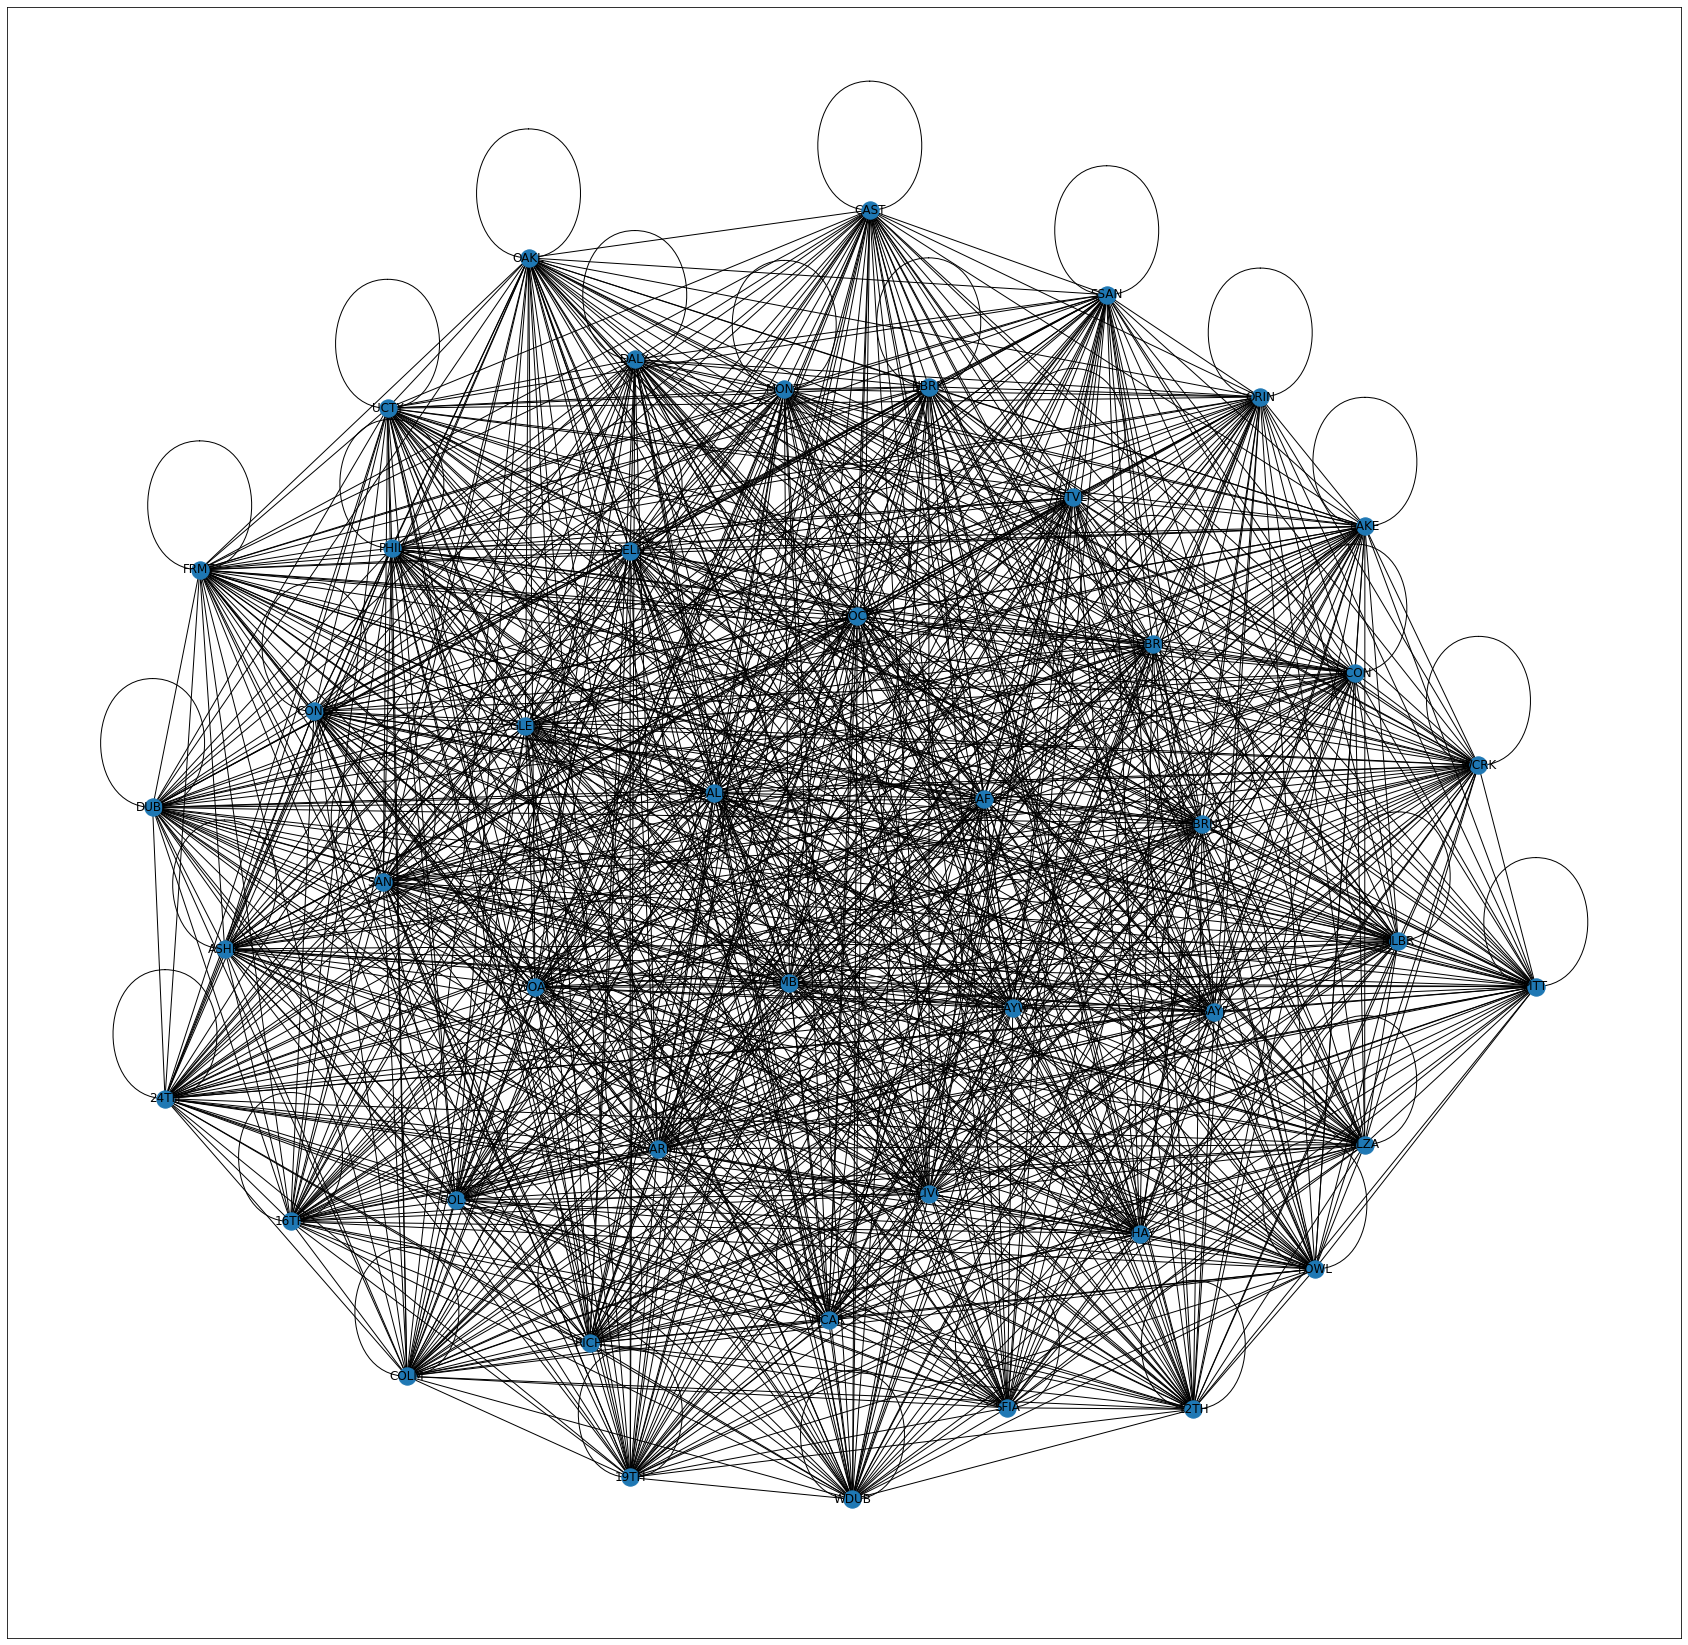

In [83]:
plt.figure(figsize=(30,30))
nx.draw_networkx(df_distance_table,with_labels=True)

In [32]:
df['Trip Count'].value_counts()

1       1628136
2        984913
3        661436
4        476892
5        361060
         ...   
1001          1
876           1
811           1
748           1
877           1
Name: Trip Count, Length: 892, dtype: int64

In [ ]:
# Which BART station is the busiest?
# What is the least popular BART route?

In [33]:
((df.groupby('Origin Station')['Destination Station']).value_counts()).sort_values()

Origin Station  Destination Station
WARM            MLBR                     80
MLBR            WARM                     92
WARM            COLM                     93
                SBRN                    127
COLM            WARM                    137
                                       ... 
MCAR            CIVC                   4969
DBRK            EMBR                   4972
EMBR            DELN                   4979
POWL            DELN                   5011
EMBR            24TH                   5030
Name: Destination Station, Length: 2116, dtype: int64

In [41]:
total_Pass=df.groupby(by=['Origin Station', 'Hour'])['Trip Count'].sum().sort_values().reset_index()
total_Pass

Origin Station  Hour  Trip Count
0              PLZA     3           2
1              ORIN     2           2
2              WARM     2           2
3              LAFY     2           2
4              SHAY     3           3
...             ...   ...         ...
1096           POWL    18     1021918
1097           EMBR    18     1534578
1098           EMBR    17     1584552
1099           MONT    17     1630263
1100           MONT    18     1727703

[1101 rows x 3 columns]

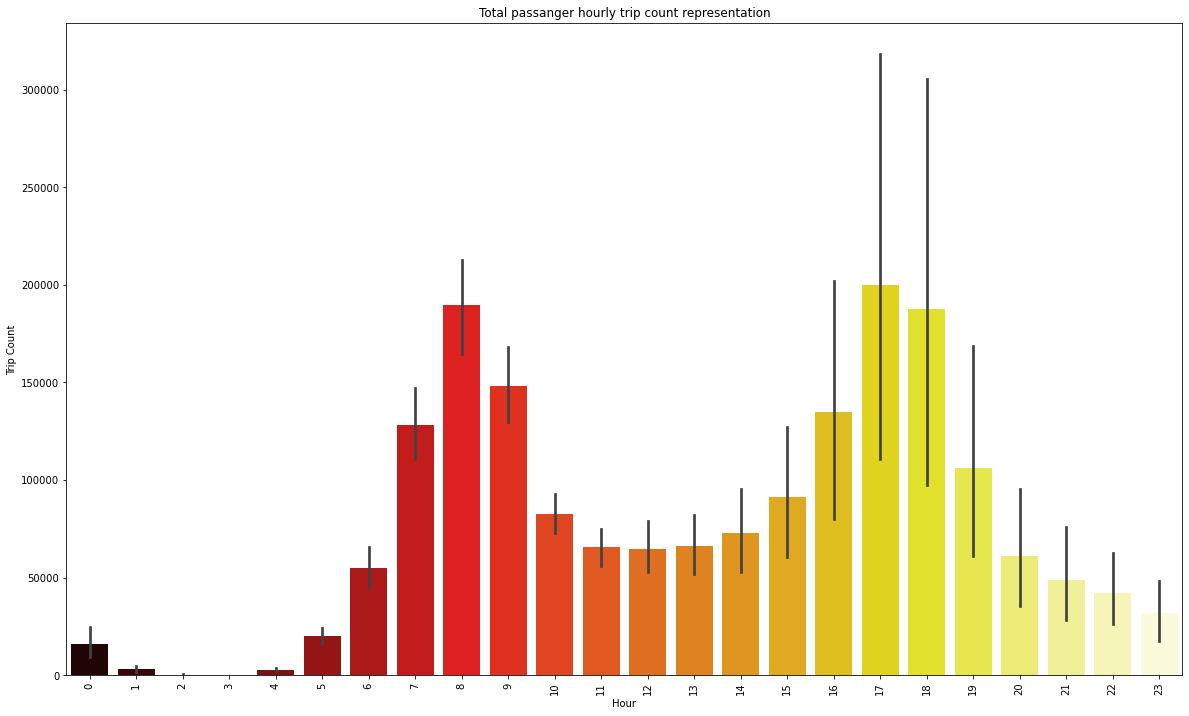

In [47]:
plt.figure(figsize=(20,12))
plt.title("Total passanger hourly trip count representation")
sns.barplot(x=total_Pass['Hour'], y=total_Pass['Trip Count'], palette='hot')
plt.xticks(rotation=90);

In [ ]:
# Which BART station is the busiest?
# What is the least popular BART route?

In [43]:
popular_station=df.groupby(by=['Origin Station', 
                               'Destination Station'])['Trip Count'].sum().sort_values().reset_index()
popular_station

Origin Station Destination Station  Trip Count
0              WARM                MLBR          96
1              WARM                COLM         102
2              MLBR                WARM         105
3              WARM                SBRN         136
4              COLM                WARM         153
...             ...                 ...         ...
2111           24TH                MONT      454002
2112           DUBL                EMBR      458461
2113           BALB                POWL      463855
2114           BALB                MONT      491264
2115           POWL                BALB      527408

[2116 rows x 3 columns]

In [46]:
origin_count=df.groupby(by=['Origin Station'])['Trip Count'].sum().sort_values().reset_index()
origin_count.columns=['Station Name', 'Passenger Count']

destination_count=df.groupby(by=['Destination Station'])['Trip Count'].sum().sort_values().reset_index()
destination_count=['Station Name', 'Passenger Count']

popular_station2=origin_count.append(destination_count)
popular_station2=popular_station2.groupby(by=['Station Name'])['Passenger Count'].sum().sort_values().reset_index()

popular_station2

Station Name  Passenger Count
0          WARM         220917.0
1          OAKL         350242.0
2          NCON         534652.0
3          ORIN         587162.0
4          CAST         589196.0
5          SHAY         609613.0
6          SSAN         697097.0
7          LAFY         702711.0
8          WDUB         704946.0
9          SBRN         744340.0
10         COLM         855414.0
11         RICH         883251.0
12         NBRK         927858.0
13         UCTY         936025.0
14         HAYW         971417.0
15         PLZA         991493.0
16         ASHB        1118448.0
17         ROCK        1128520.0
18         BAYF        1189143.0
19         CONC        1206012.0
20         SANL        1212190.0
21         PITT        1271600.0
22         MLBR        1357194.0
23         WCRK        1376182.0
24         LAKE        1416444.0
25         PHIL        1439757.0
26         COLS        1482958.0
27         GLEN        1584448.0
28         WOAK        1590550.0
29         SFIA        1591823.0
30         DUBL        1646085.0
31         FRMT        1654304.0
32         FTVL        1677144.0
33         DELN        1686977.0
34         MCAR        1815802.0
35         DALY        1890941.0
36         BALB        2338969.0
37         19TH        2574960.0
38         DBRK        2580229.0
39         12TH        2620709.0
40         16TH        2633565.0
41         24TH        2683197.0
42         CIVC        4996310.0
43         POWL        6908814.0
44         EMBR        7766479.0
45         MONT        7906810.0

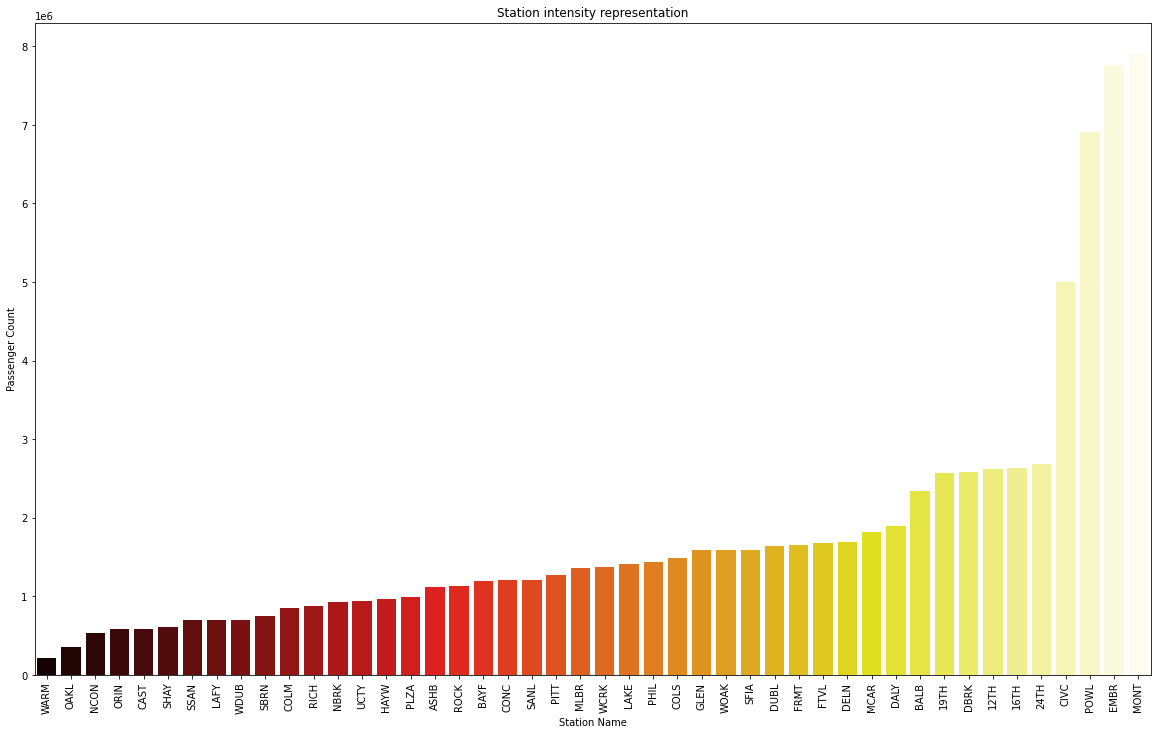

In [48]:
plt.figure(figsize=(20,12))
plt.title("Station intensity representation")
sns.barplot(x=popular_station2['Station Name'], y=popular_station2['Passenger Count'], palette='hot')
plt.xticks(rotation=90);

In [49]:
# When is the best time to go to SF from Berkeley if you want to find a seat?

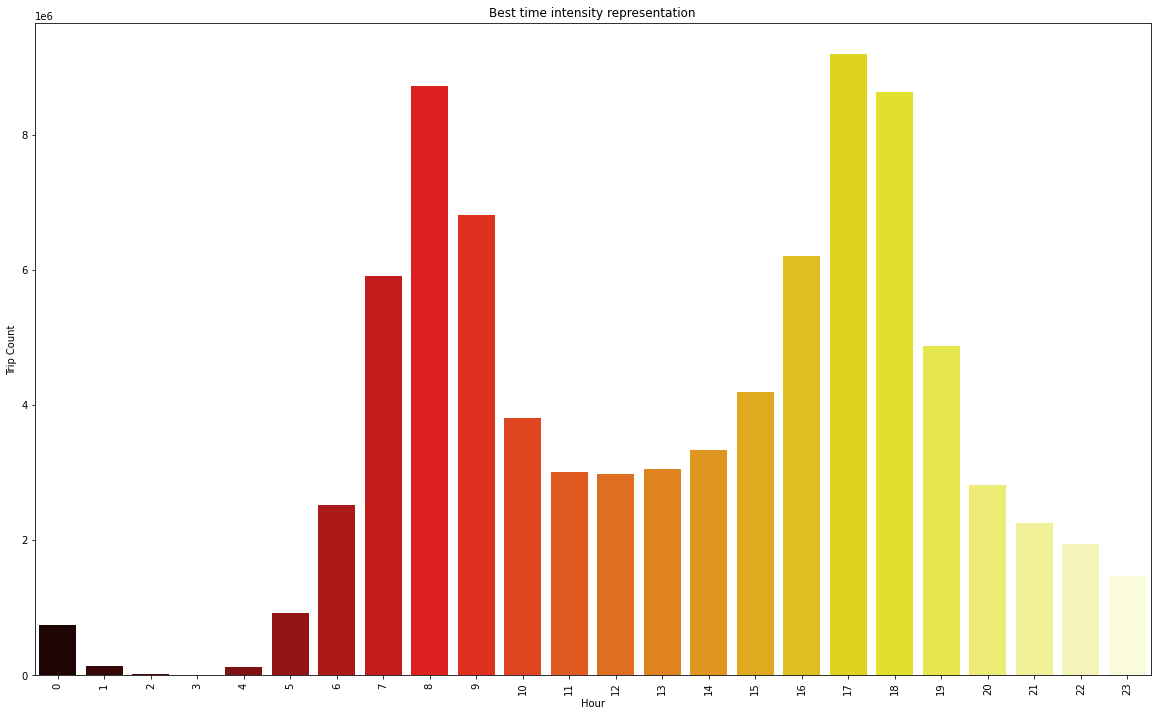

In [51]:
best_time=df[(df['Origin Station']=='SSAN') & (df['Destination Station']=='DBRK')]
best_time=df.groupby('Hour')['Trip Count'].sum().reset_index()
best_time


plt.figure(figsize=(20,12))
plt.title("Best time intensity representation")
sns.barplot(x=best_time['Hour'], y=best_time['Trip Count'], palette='hot')
plt.xticks(rotation=90);

In [ ]:
#Which day of the week is the busiest?

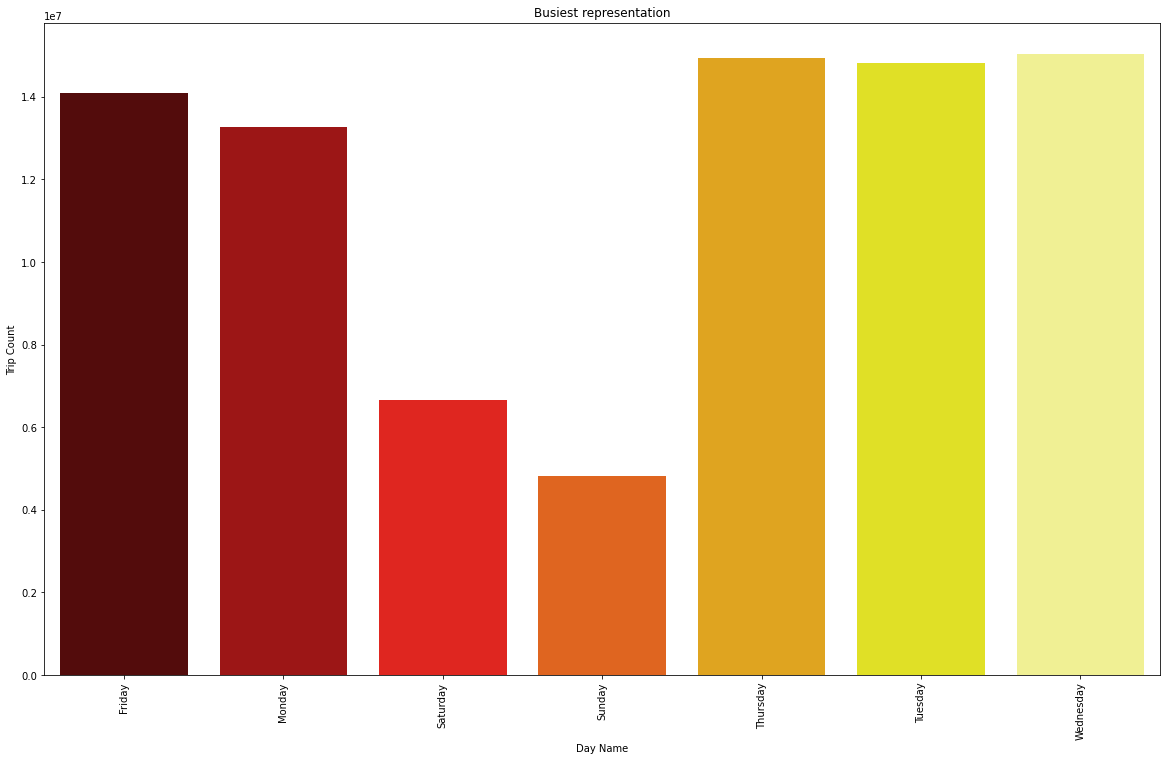

In [54]:
total_pass_day=df.groupby('Day Name')['Trip Count'].sum().reset_index()

plt.figure(figsize=(20,12))
plt.title("Busiest representation")
sns.barplot(x=total_pass_day['Day Name'], y=total_pass_day['Trip Count'], palette='hot')
plt.xticks(rotation=90);

In [ ]:
# How many people take the BART late at night?

Total passanger count: 1930337


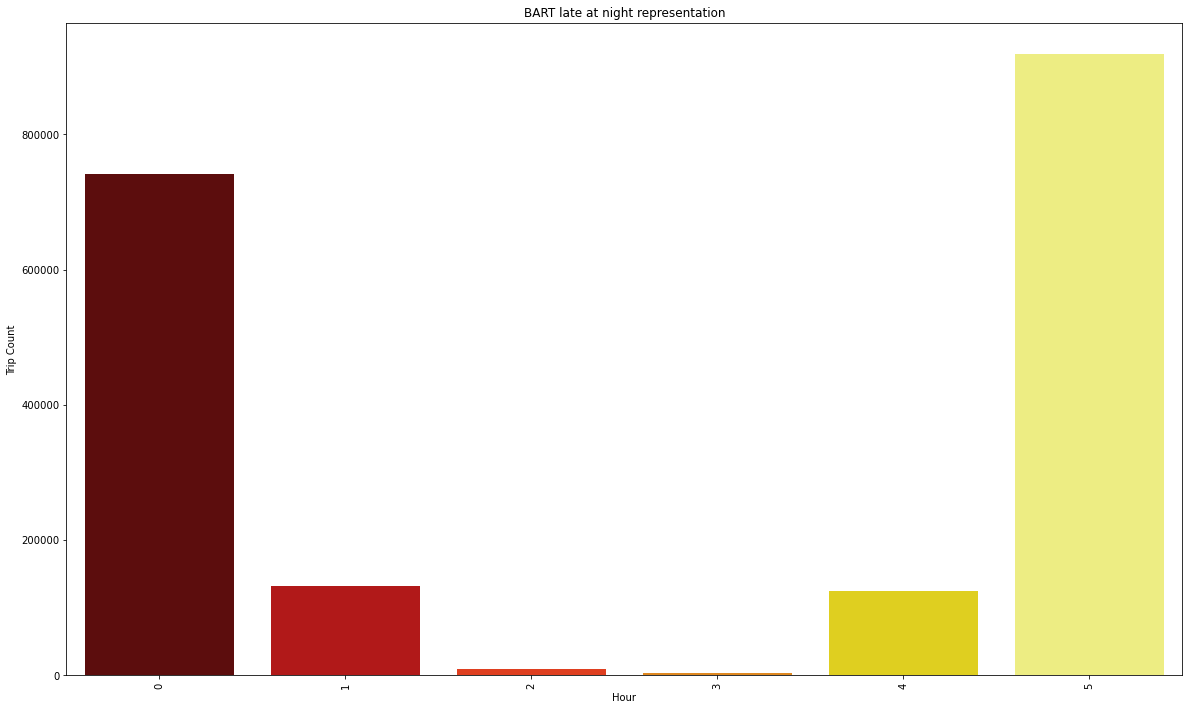

In [56]:
late_night=df[(df['Hour']<=5)]
late_night=late_night.groupby('Hour')['Trip Count'].sum().reset_index()

total=late_night['Trip Count'].sum()
print('Total passanger count: ' + str(total))

plt.figure(figsize=(20,12))
plt.title("BART late at night representation")
sns.barplot(x=late_night['Hour'], y=late_night['Trip Count'], palette='hot')
plt.xticks(rotation=90);

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6648559 entries, 0 to 6648558
Data columns (total 14 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Hour                 int64  
 1   Origin Station       object 
 2   Destination Station  object 
 3   Trip Count           int64  
 4   OS Latitude          float64
 5   OS Longitude         float64
 6   DS Latitude          float64
 7   DS Longitude         float64
 8   Day                  int64  
 9   Month                int64  
 10  Year                 int64  
 11  Day Name             object 
 12  Month Name           object 
 13  Distance             float64
dtypes: float64(5), int64(5), object(4)
memory usage: 710.1+ MB


In [61]:
df['Origin Station']=df['Origin Station'].astype('category')
df['Destination Station']=df['Destination Station'].astype('category')
df['Day Name']=df['Day Name'].astype('category')
df=df.drop('Month Name', axis=1)

for i in df.columns:
    if (df[i].dtypes == 'object'):
        df[i]=df[i].astype('float64')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6648559 entries, 0 to 6648558
Data columns (total 13 columns):
 #   Column               Dtype   
---  ------               -----   
 0   Hour                 int64   
 1   Origin Station       category
 2   Destination Station  category
 3   Trip Count           int64   
 4   OS Latitude          float64 
 5   OS Longitude         float64 
 6   DS Latitude          float64 
 7   DS Longitude         float64 
 8   Day                  int64   
 9   Month                int64   
 10  Year                 int64   
 11  Day Name             category
 12  Distance             float64 
dtypes: category(3), float64(5), int64(5)
memory usage: 526.3 MB


In [ ]:
# Question B: Build a model that can predicted the number of people commuting to work by

In [63]:
x,y=df.drop("Trip Count",axis=1),df[["Trip Count"]]
x=pd.get_dummies(x,drop_first=True)

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

2022-11-23 13:49:53.243883: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [65]:
x=scaler.fit_transform(x)

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [75]:
model=Sequential()
model.add(Dense(800, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')#mse regression

In [76]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=128, epochs=5, verbose=1)

Epoch 1/5
41554/41554 [==============================] - 744s 18ms/step - loss: 201.4442 - val_loss: 138.7941
Epoch 2/5
41554/41554 [==============================] - 946s 23ms/step - loss: 133.8481 - val_loss: 133.5493
Epoch 3/5
41554/41554 [==============================] - 688s 17ms/step - loss: 121.8339 - val_loss: 106.7729
Epoch 4/5
41554/41554 [==============================] - 708s 17ms/step - loss: 115.5371 - val_loss: 112.8942
Epoch 5/5
41554/41554 [==============================] - 676s 16ms/step - loss: 110.5690 - val_loss: 106.7572


In [77]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 800)               84800     
                                                                 
 dense_37 (Dense)            (None, 800)               640800    
                                                                 
 dense_38 (Dense)            (None, 800)               640800    
                                                                 
 dense_39 (Dense)            (None, 800)               640800    
                                                                 
 dense_40 (Dense)            (None, 800)               640800    
                                                                 
 dense_41 (Dense)            (None, 800)               640800    
                                                                 
 dense_42 (Dense)            (None, 1)                

<AxesSubplot:>

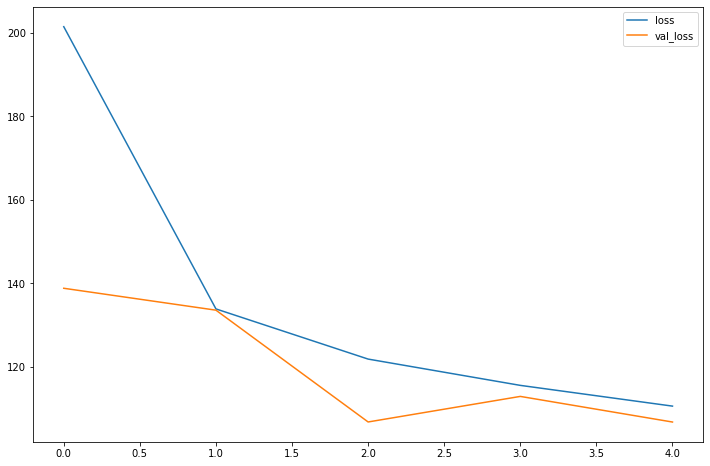

In [78]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [79]:
pred=model.predict(x_test)

41554/41554 [==============================] - 134s 3ms/step


In [80]:
(mean_squared_error(y_test,pred))**.5

10.332330682171335

In [81]:
r2_score(y_test,pred) 

0.9029158335704877